<a href="https://colab.research.google.com/github/saur112/sentiment-Analysis-of-cryptocurrency/blob/main/project_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 240 kB 4.8 MB/s 
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=ebed24ad7d658eb75b3d01b0d49e419b2e4137f1e5028286af53c2f1341b43e4
  Stored in directory: /root/.cache/pip/wheels/86/62/9e/a6b27a681abcde69970dbc0326ff51955f3beac72f15696984
Successfully built emoji


In [ ]:
import tweepy
from textblob import TextBlob
import pandas as pd
import numpy as np
import re
import emoji
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# plt.style.use('fivethirtyeight')

In [ ]:
api_key="b86rarCmDJAwfCZF49FTNzwxt"
api_key_secret="qBwKbsVHfGpW9xuY1Jn1IG3b9Xipb6hHWSEapAEpEJkO2rfxWQ"
access_token="1551961597903785984-wgvBdKJbHXeEFJmMt23RZ4P1Y8XX4C"
access_token_secret="0obevQVW3QgyIPlkxAWJ4B5dz3SpgNZdEH3Tyuho3PFFI"

In [ ]:
#fetching api obj
authentication=tweepy.OAuthHandler(api_key,api_key_secret)
authentication.set_access_token(access_token,access_token_secret)

api=tweepy.API(authentication,wait_on_rate_limit=True)
print(api)


In [ ]:

posts=api.user_timeline(screen_name="BillGates",count=100,tweet_mode="extended")
k=1
for i in posts[0:5]:
  print( str(k)+") "+i.full_text+'\n')
  k+=1

1) In order to solve our world’s sanitation crisis, we need smarter toilets that don’t rely on sewage systems and prevent the spread of diseases. #WorldToiletDay https://t.co/gbp9F0GxlE

2) Collaboration and more open access to data have made seemingly impossible health breakthroughs a reality, like COVID-19 vaccines. @AlzData is putting the power of data behind one of our most critical health challenges. https://t.co/Qtatf2WMds

3) From decreasing maternal mortality to lowering rates of vaccine-preventable diseases, @WendoAszed is a true hero in her community. https://t.co/tuAz440QNx

4) Africa has always been at the heart of our foundation’s mission. Today, we are announcing our commitment of $7 billion over the next 4 years for the development of more breakthrough innovations in health and agriculture across the continent. https://t.co/imh57I2hdg

5) @Amref_Worldwide is doing great things for health within Kenya and across Africa thanks to the leadership of @daktari1. It was a pleas

In [ ]:
search='#Ethereum-filter:retweets'
# search='#viratkohli-filter:retweets'
# search='#Yuzi Chahal-filter:retweets'
# search='#peter-filter:retweets'

t=tweepy.Cursor(api.search,q=search,lang='en',since='2022-04-05',tweet_mode='extended').items(100)
print(t)
l=[i.full_text for i in t]


In [ ]:
df=pd.DataFrame(l,columns=['Tweets'])#data extraction
df.head(10)

,Tweets
0,#Ethereum price update: \n\n#ETH $1272.92 USD\...
1,Slow 9 | Normal 9 | Fast 14.7 | Instant 21.4 👈...
2,Crypto Exchange Kraken Settles With Treasury D...
3,2. The #Ethereum merge is working as it’s supp...
4,🚨 SBF To Appear Before Texas Regulator In Secu...
5,Breaking news: https://t.co/SBtokx06aI #BTC #...
6,#Ethereum price update: \n\n#ETH $1267.01 USD\...
7,Breaking news: https://t.co/Th0JLiYvLo #BTC #...
8,@VitalikButerin #Ethereum is not freedom
9,⏰ $GMX showing some unusual activity. Keep it ...


In [ ]:
#cleaning the tweets
def clean_tweet(a):
  a=re.sub('#bitcoin','bitcoin',a)
  a=re.sub('#Bitcoin','Bitcoin',a)
  a=re.sub('#Ethereum','Ethereum',a)
  a=emoji.demojize(a)
  a=a.replace(":","")
  a = BeautifulSoup(a).get_text()
  a=re.sub('(#[A-Za-z0-9]+|@[A-Za-z0-9])',"",a)
  a=' '.join(re.sub("[\.\,\!\?\:\;\-\=]", " ", a).split())
  a=re.sub('\\n','',a)
  a=re.sub('\w+:\/\/\S+','',a)
  # a = ' '.join(re.sub("(\w+:\/\/\S+)", " ", a).split())
  return a 
df['fresh_tweet']=df['Tweets'].apply(clean_tweet)
df.head(10)

,Tweets,fresh_tweet
0,#Ethereum price update: \n\n#ETH $1272.92 USD\...,Ethereum price update $1272 92 USD Bitcoin 0 0...
1,Slow 9 | Normal 9 | Fast 14.7 | Instant 21.4 👈...,Slow 9 | Normal 9 | Fast 14 7 | Instant 21 4 b...
2,Crypto Exchange Kraken Settles With Treasury D...,Crypto Exchange Kraken Settles With Treasury D...
3,2. The #Ethereum merge is working as it’s supp...,2 The Ethereum merge is working as it’s suppos...
4,🚨 SBF To Appear Before Texas Regulator In Secu...,police_car_light SBF To Appear Before Texas Re...
5,Breaking news: https://t.co/SBtokx06aI #BTC #...,Breaking news https//t co/SBtokx06aI Ethereum ...
6,#Ethereum price update: \n\n#ETH $1267.01 USD\...,Ethereum price update $1267 01 USD Bitcoin 0 0...
7,Breaking news: https://t.co/Th0JLiYvLo #BTC #...,Breaking news https//t co/Th0JLiYvLo Ethereum ...
8,@VitalikButerin #Ethereum is not freedom,italikButerin Ethereum is not freedom
9,⏰ $GMX showing some unusual activity. Keep it ...,alarm_clock $GMX showing some unusual activity...


In [ ]:
def getSubjectivity(b):
  return TextBlob(b).sentiment.subjectivity

def getpolarity(b):
  return TextBlob(b).sentiment.polarity

df['subjectivity']=df['fresh_tweet'].apply(getSubjectivity)
df['polarity']=df['fresh_tweet'].apply(getpolarity)
df.head(50)

,Tweets,fresh_tweet,subjectivity,polarity
0,#Ethereum price update: \n\n#ETH $1272.92 USD\...,Ethereum price update $1272 92 USD Bitcoin 0 0...,0.250000,0.000000
1,Slow 9 | Normal 9 | Fast 14.7 | Instant 21.4 👈...,Slow 9 | Normal 9 | Fast 14 7 | Instant 21 4 b...,0.515278,-0.012500
2,Crypto Exchange Kraken Settles With Treasury D...,Crypto Exchange Kraken Settles With Treasury D...,0.000000,0.000000
3,2. The #Ethereum merge is working as it’s supp...,2 The Ethereum merge is working as it’s suppos...,0.750000,0.750000
4,🚨 SBF To Appear Before Texas Regulator In Secu...,police_car_light SBF To Appear Before Texas Re...,0.000000,0.000000
5,Breaking news: https://t.co/SBtokx06aI #BTC #...,Breaking news https//t co/SBtokx06aI Ethereum ...,0.000000,0.000000
6,#Ethereum price update: \n\n#ETH $1267.01 USD\...,Ethereum price update $1267 01 USD Bitcoin 0 0...,0.250000,0.000000
7,Breaking news: https://t.co/Th0JLiYvLo #BTC #...,Breaking news https//t co/Th0JLiYvLo Ethereum ...,0.000000,0.000000
8,@VitalikButerin #Ethereum is not freedom,italikButerin Ethereum is not freedom,0.000000,0.000000
9,⏰ $GMX showing some unusual activity. Keep it ...,alarm_clock $GMX showing some unusual activity...,1.000000,0.200000


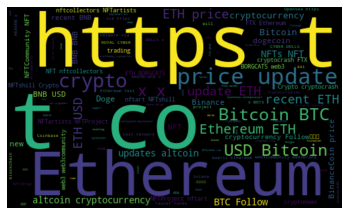

In [ ]:
allwords=''.join([t for t in df['Tweets']])
wordcloud=WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(allwords)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# function to get sentiment of tweets
def getSentiment(tweet):
  if tweet<0:
    return "Negative"
  elif tweet==0:
    return "Neutral"
  else:
    return "Positive"

In [ ]:
# Now we are storing the sentiments
df['Sentiment']=df['polarity'].apply(getSentiment)
df.head(20)

,Tweets,fresh_tweet,subjectivity,polarity,Sentiment
0,#Ethereum price update: \n\n#ETH $1272.92 USD\...,Ethereum price update $1272 92 USD Bitcoin 0 0...,0.250000,0.0000,Neutral
1,Slow 9 | Normal 9 | Fast 14.7 | Instant 21.4 👈...,Slow 9 | Normal 9 | Fast 14 7 | Instant 21 4 b...,0.515278,-0.0125,Negative
2,Crypto Exchange Kraken Settles With Treasury D...,Crypto Exchange Kraken Settles With Treasury D...,0.000000,0.0000,Neutral
3,2. The #Ethereum merge is working as it’s supp...,2 The Ethereum merge is working as it’s suppos...,0.750000,0.7500,Positive
4,🚨 SBF To Appear Before Texas Regulator In Secu...,police_car_light SBF To Appear Before Texas Re...,0.000000,0.0000,Neutral
5,Breaking news: https://t.co/SBtokx06aI #BTC #...,Breaking news https//t co/SBtokx06aI Ethereum ...,0.000000,0.0000,Neutral
6,#Ethereum price update: \n\n#ETH $1267.01 USD\...,Ethereum price update $1267 01 USD Bitcoin 0 0...,0.250000,0.0000,Neutral
7,Breaking news: https://t.co/Th0JLiYvLo #BTC #...,Breaking news https//t co/Th0JLiYvLo Ethereum ...,0.000000,0.0000,Neutral
8,@VitalikButerin #Ethereum is not freedom,italikButerin Ethereum is not freedom,0.000000,0.0000,Neutral
9,⏰ $GMX showing some unusual activity. Keep it ...,alarm_clock $GMX showing some unusual activity...,1.000000,0.2000,Positive


In [ ]:
j=1
sort=df.sort_values(by=['polarity'])
for i in range(0,sort.shape[0]):
  if (sort['Sentiment'][i]=='Positive'):
    print(str(j)+") "+sort['fresh_tweet'][i])
    print()
    j+=1

1) 2 The Ethereum merge is working as it’s supposed to and has held up remarkably well given the debacle

2) alarm_clock $GMX showing some unusual activity Keep it on watchlist for gaining momentum and volume information Exchange small_blue_diamond Price 46 6 money_bag $ Volume 221 9K $ globe_with_meridians M Cap 357 5M red_exclamation_mark 15 min delayed small_blue_diamond Get the fastest Momentum System https//t co/oPPxT3GGaE bitcoin https//t co/JRRZT86j07

3) Graham #哈希彩票 Kevin #世界杯 Joy Ethereum Grain #世界杯投注 https//t co/UoEriVZgOw

4) woman_dancing5555 Lady y00tsred_heart Cheap Free Mintbackhand_index_pointing_down https//t co/bEhb3DWDaX Ethereum https//t co/a7UhQCfFSU

5) 3 It was not until May 14 2016 the official launch of the second phase of Ethereum the "Homeland" version that the stability problem was completely solved and a large number of developers were attracted to build the smart contract ecology of Ethereum Ethereum

6) Just buddies is coming with a different vibe to the

In [ ]:
j=1
sort=df.sort_values(by=['polarity'],ascending='False')
for i in range(0,sort.shape[0]):
  if (sort['Sentiment'][i]=='Negative'):
    print(str(j)+") "+sort['fresh_tweet'][i])
    print()
    j+=1

1) Slow 9 | Normal 9 | Fast 14 7 | Instant 21 4 backhand_index_pointing_left current Ethereum gas prices in gwei DM me a price and I will DM you as soon as gas drops below that price thumbs_up Ethereum Have you used the other bots in my family VAXGas TMGas

2) « Anger to depression » raising_hands bitcoin https//t co/LowHT7bHBB

3) ia_nft_girl Check out my new collection ALIEN PETS on OpenSea https//t co/P2MhvxYZDQ via pensea

4) qurtleee Check out my new collection ALIEN PETS on OpenSea https//t co/P2MhvxYZDQ via pensea

5) hragus Check out my new collection ALIEN PETS on OpenSea https//t co/P2MhvxYZDQ via pensea

6) MARKET UPDATE $ETH Ethereum broke the $1 490 support level as at when the tagged note was captured in September Price went below the support level and head down to +/ $1 023 as forecasted As cryptoFarmers we perceive the moves to take position https//t co/9jZYD9jkHn https//t co/OegCV4BNJZ



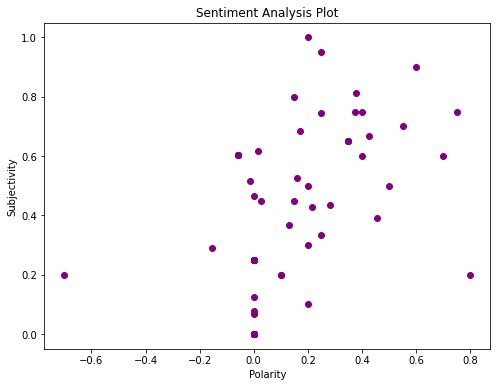

In [ ]:
# plotting to show the subjectivity and polarity
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
  plt.scatter(df['polarity'][i],df['subjectivity'][i],color='Purple')
plt.title('Sentiment Analysis Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()


In [ ]:
# calculate the percentage

ptweets=df[df.Sentiment=='Positive']
ptweets=ptweets['fresh_tweet']
print("Positive percentage",round((ptweets.shape[0]/df.shape[0])*100,1))

ptweets=df[df.Sentiment=='Negative']
ptweets=ptweets['fresh_tweet']
print("Negative percentage",round((ptweets.shape[0]/df.shape[0])*100,1))

ptweets=df[df.Sentiment=='Neutral']
ptweets=ptweets['fresh_tweet']
print("Neutral percentage",round((ptweets.shape[0]/df.shape[0])*100,1))


Positive percentage 33.0
Negative percentage 6.0
Neutral percentage 61.0


In [ ]:
df.shape[0]

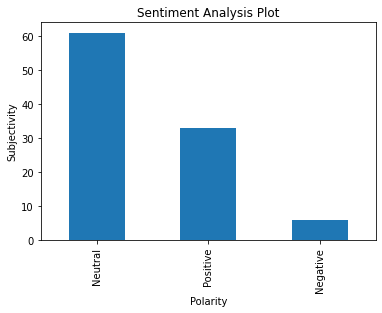

In [ ]:
df['Sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Analysis Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

Neutral     61
Positive    33
Negative     6
Name: Sentiment, dtype: int64


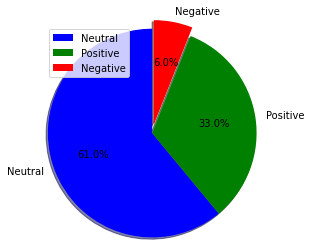

In [ ]:
# bar chart for analysis
a=df['Sentiment'].value_counts()
print(a)
l=[]
for i in a:
  l.append(i)
activities = ["Neutral","Positive","Negative"]
  
colors = ['b', 'g', 'r']
  
# plotting the pie chart
plt.pie(l, labels = activities, colors=colors, 
        startangle=90, shadow = True, explode = (0, 0, 0.1),
        radius = 1.2, autopct = '%1.1f%%')

plt.legend()
plt.show()